# 1) Import Data

This dataset is from WHO's API. 
It contains total flu cases by flu type, between October 2009 to September 2019 recorded in  India.


  *  Import Python packages and dataset.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

fludata = pd.read_csv('./FluNet0919.csv', skiprows = 3, sep=',') #Remove top rows as they were sub headings in the table imported.
fludata.tail(4)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
508,India,South-East Asia Region of WHO,Southern Asia,2019,5,2019-01-28,2019-02-03,2754.0,2723,NaN,...,NaN,NaN,670,2.0,NaN,NaN,2,672,2051.0,Regional Outbreak
509,India,South-East Asia Region of WHO,Southern Asia,2019,6,2019-02-04,2019-02-10,2927.0,2915,NaN,...,NaN,NaN,739,6.0,NaN,2.0,8,747,2168.0,Regional Outbreak
510,India,South-East Asia Region of WHO,Southern Asia,2019,7,2019-02-11,2019-02-17,3073.0,3068,NaN,...,NaN,NaN,868,2.0,NaN,1.0,3,871,2197.0,Regional Outbreak
511,India,South-East Asia Region of WHO,Southern Asia,2019,8,2019-02-18,2019-02-24,2849.0,2800,NaN,...,NaN,NaN,606,3.0,1.0,1.0,5,611,2189.0,Regional Outbreak


In [27]:
fludata.shape

(512, 22)

# 2) Explore



In [28]:
fludata.describe()

,Year,Week,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2
count,512.000000,512.000000,499.000000,512.000000,382.000000,486.000000,461.000000,387.0,387.0,512.000000,424.000000,396.000000,498.000000,512.000000,512.000000,116.000000
mean,2013.671875,26.294922,335.064128,321.871094,0.528796,48.880658,11.694143,0.0,0.0,57.322266,0.391509,0.189394,6.279116,6.578125,63.900391,314.948276
std,2.874708,15.288515,442.093563,429.864648,3.382518,116.032426,29.017007,0.0,0.0,129.681529,1.341297,0.892721,10.829593,11.146496,129.879938,413.900342
min,2009.000000,1.000000,14.000000,9.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,2011.000000,13.000000,132.000000,120.000000,0.000000,1.000000,0.000000,0.0,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,7.000000,124.750000
50%,2014.000000,27.000000,212.000000,205.500000,0.000000,8.000000,2.000000,0.0,0.0,17.000000,0.000000,0.000000,2.000000,3.000000,27.000000,214.500000
75%,2016.000000,40.000000,364.000000,355.250000,0.000000,44.500000,10.000000,0.0,0.0,53.000000,0.000000,0.000000,8.000000,9.000000,62.250000,314.000000
max,2019.000000,53.000000,3073.000000,3068.000000,41.000000,1033.000000,278.000000,0.0,0.0,1038.000000,12.000000,13.000000,83.000000,88.000000,1040.000000,2197.000000


In [29]:
fludata.corr()

,Year,Week,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2
Year,1.000000,-0.047397,-0.072323,-0.029089,-0.261265,-0.030382,0.127626,NaN,NaN,-0.006566,0.423273,0.067248,-0.142381,-0.124642,-0.017253,0.529238
Week,-0.047397,1.000000,-0.110743,-0.097428,0.085765,-0.110968,-0.131627,NaN,NaN,-0.106878,-0.148333,-0.153828,0.021025,-0.009546,-0.107534,-0.293636
SPEC_RECEIVED_NB,-0.072323,-0.110743,1.000000,0.998629,0.441451,0.940864,0.625767,NaN,NaN,0.966594,0.172630,0.030470,0.077269,0.071978,0.971876,0.998579
SPEC_PROCESSED_NB,-0.029089,-0.097428,0.998629,1.000000,0.398377,0.941346,0.620696,NaN,NaN,0.964925,0.180974,0.033852,0.093602,0.087827,0.970988,0.998451
AH1,-0.261265,0.085765,0.441451,0.398377,1.000000,0.331640,0.611401,NaN,NaN,0.426902,-0.027447,-0.026553,-0.092480,-0.092141,0.417078,NaN
AH1N12009,-0.030382,-0.110968,0.940864,0.941346,0.331640,1.000000,0.453039,NaN,NaN,0.980467,0.095085,-0.004074,-0.018032,-0.019679,0.978407,0.981094
AH3,0.127626,-0.131627,0.625767,0.620696,0.611401,0.453039,1.000000,NaN,NaN,0.618689,0.229163,-0.018502,-0.113296,-0.096068,0.610408,0.925454
AH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANOTSUBTYPED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INF_A,-0.006566,-0.106878,0.966594,0.964925,0.426902,0.980467,0.618689,NaN,NaN,1.000000,0.129955,-0.009914,-0.025235,-0.025163,0.996313,0.978707


In [30]:
fludata.dtypes

Country               object
WHOREGION             object
FLUREGION             object
Year                   int64
Week                   int64
SDATE                 object
EDATE                 object
SPEC_RECEIVED_NB     float64
SPEC_PROCESSED_NB      int64
AH1                  float64
AH1N12009            float64
AH3                  float64
AH5                  float64
ANOTSUBTYPED         float64
INF_A                  int64
BYAMAGATA            float64
BVICTORIA            float64
BNOTDETERMINED       float64
INF_B                  int64
ALL_INF                int64
ALL_INF2             float64
TITLE                 object
dtype: object

# 3) Clean & Merge

*  Find NaN and replace them with 0 as no data means no cases reported.
*  Remove region columns as this is same region data.
*  Remove columns with NaN through out are: AH5 and ANOTSUBTYPED


In [31]:
#fludata1 = fludata.dropna(axis='columns', how='all')
fludata = fludata.fillna(0)
fludata.tail()

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
507,India,South-East Asia Region of WHO,Southern Asia,2019,4,2019-01-21,2019-01-27,2041.0,2041,0.0,...,0.0,0.0,601,4.0,0.0,0.0,4,605,1436.0,Regional Outbreak
508,India,South-East Asia Region of WHO,Southern Asia,2019,5,2019-01-28,2019-02-03,2754.0,2723,0.0,...,0.0,0.0,670,2.0,0.0,0.0,2,672,2051.0,Regional Outbreak
509,India,South-East Asia Region of WHO,Southern Asia,2019,6,2019-02-04,2019-02-10,2927.0,2915,0.0,...,0.0,0.0,739,6.0,0.0,2.0,8,747,2168.0,Regional Outbreak
510,India,South-East Asia Region of WHO,Southern Asia,2019,7,2019-02-11,2019-02-17,3073.0,3068,0.0,...,0.0,0.0,868,2.0,0.0,1.0,3,871,2197.0,Regional Outbreak
511,India,South-East Asia Region of WHO,Southern Asia,2019,8,2019-02-18,2019-02-24,2849.0,2800,0.0,...,0.0,0.0,606,3.0,1.0,1.0,5,611,2189.0,Regional Outbreak


In [32]:
# drop columns with no data and other columns we don't need like subtypes of flu.
fludata= fludata[fludata["Week"]!= 53]


fludata1 = fludata
fludata1 = fludata1.drop(columns =['WHOREGION', 'FLUREGION', 'SDATE', 'EDATE', 'TITLE', 'Country', 'ANOTSUBTYPED', 'AH5'])

fludata1.tail()

,Year,Week,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2
507,2019,4,2041.0,2041,0.0,365.0,236.0,601,4.0,0.0,0.0,4,605,1436.0
508,2019,5,2754.0,2723,0.0,485.0,185.0,670,2.0,0.0,0.0,2,672,2051.0
509,2019,6,2927.0,2915,0.0,534.0,205.0,739,6.0,0.0,2.0,8,747,2168.0
510,2019,7,3073.0,3068,0.0,590.0,278.0,868,2.0,0.0,1.0,3,871,2197.0
511,2019,8,2849.0,2800,0.0,485.0,121.0,606,3.0,1.0,1.0,5,611,2189.0


In [33]:
# rename columns to make them more relevant

fludata1.rename(columns = {'ALL_INF':'Flu_pos','SPEC_RECEIVED_NB':'SPEC_RECD', 'SPEC_PROCESSED_NB':'SPEC_PRCD',
                              'ALL_INF2':'Flu_neg', 'BNOTDETERMINED':'B_NoSub'}, inplace = True)
fludata1.tail()

,Year,Week,SPEC_RECD,SPEC_PRCD,AH1,AH1N12009,AH3,INF_A,BYAMAGATA,BVICTORIA,B_NoSub,INF_B,Flu_pos,Flu_neg
507,2019,4,2041.0,2041,0.0,365.0,236.0,601,4.0,0.0,0.0,4,605,1436.0
508,2019,5,2754.0,2723,0.0,485.0,185.0,670,2.0,0.0,0.0,2,672,2051.0
509,2019,6,2927.0,2915,0.0,534.0,205.0,739,6.0,0.0,2.0,8,747,2168.0
510,2019,7,3073.0,3068,0.0,590.0,278.0,868,2.0,0.0,1.0,3,871,2197.0
511,2019,8,2849.0,2800,0.0,485.0,121.0,606,3.0,1.0,1.0,5,611,2189.0


# 4) Visualize the distribution

*  See distribution / corr of the type A, type B and H1N1 data.
*  Plot total Flu cases by year.

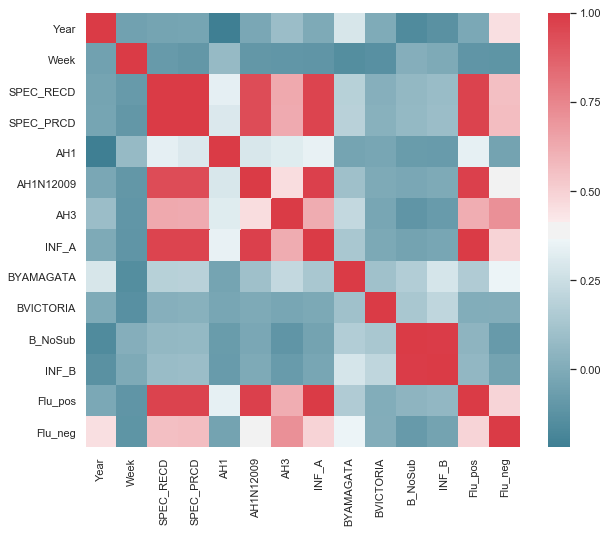

In [34]:
f, ax = plt.subplots(figsize=(10, 8))
corr = fludata1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Text(0, 0.5, 'Total Flu Cases')

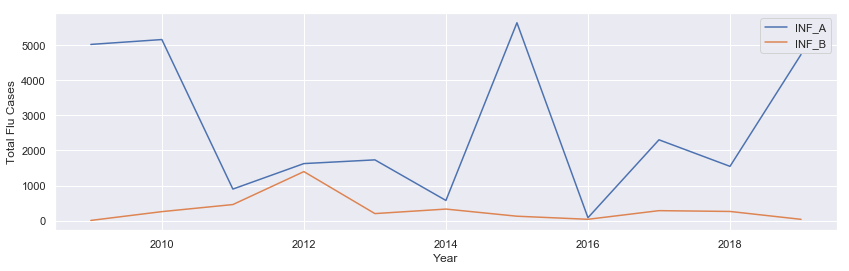

In [35]:
# see the difference in type A flu cases and type B flu cases by year

flu_year = fludata1[['Year','INF_A', 'INF_B']].groupby('Year', as_index=True).sum()

ax = flu_year.plot(kind = 'line')
ax.set_ylabel("Total Flu Cases")

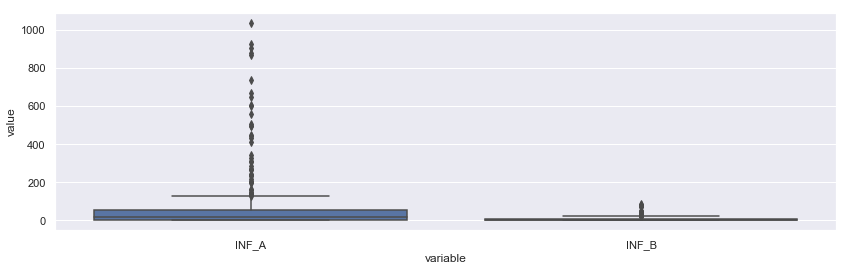

In [36]:
# see the outliers in type A flu cases and type B flu cases by year

import numpy as np; np.random.seed(42)
df = fludata1[['INF_A','INF_B']]
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [37]:
# these are not actual outliers, as flu season is different every year it could be real data point.
# we will still remove some of them even we do not need to standardize for ARIMA
# Calculate zscore to use in removal of outliers
from scipy import stats

fludata1['z_score']=stats.zscore(fludata1['Flu_pos'])
#fludata1.tail()

# remove outliers on the base of z score calculated above

fludata2 = fludata1.loc[fludata1['z_score'].abs()<=1]


Text(0, 0.5, 'Total Flu Cases')

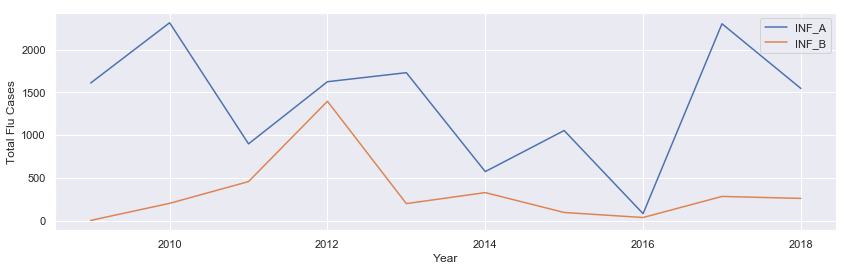

In [38]:
# see the difference in type A flu cases and type B flu cases by year after removing about 33 outliers
# From the plot, we can say that taking out some of the outliers helped us.

flu_year = fludata2[['Year','INF_A', 'INF_B']].groupby('Year', as_index=True).sum()

ax = flu_year.plot(kind = 'line')
ax.set_ylabel("Total Flu Cases")

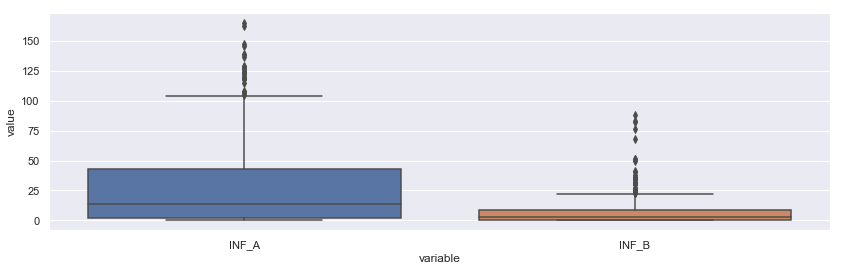

In [39]:
# plot the result

df = fludata2[['INF_A','INF_B']]
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

# 5) Stationarity of Time series

## 5.1) Create & Explore the time series

In [40]:
# Our data has week and year as seperate column, I will create new column to store week of the year

fludata2['week_year'] = pd.to_datetime(fludata2.Year.astype(str), format='%Y') + \
             pd.to_timedelta(fludata2.Week.mul(7).astype(str) + ' days')
fludata2=fludata2.fillna(0)


In [41]:
fluser = fludata2[['week_year', 'Flu_pos', 'INF_A', 'INF_B','Week','Year']]
#  convert df to timeseries by making week_year index
fluser = fluser.set_index('week_year')

#ts_ar = fluser
#ar_stat = fluser['Flu_pos'] #only column for stat 


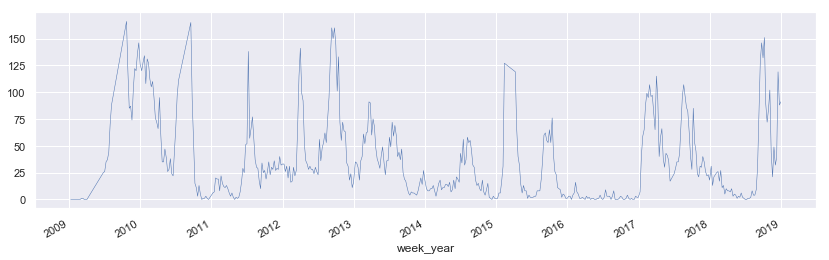

In [42]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(14, 4)})
fluser['Flu_pos'].plot(linewidth=0.5);

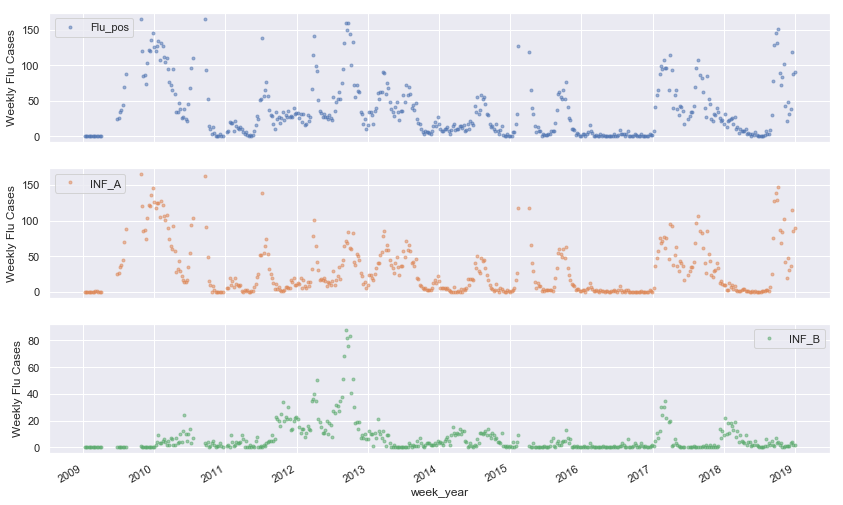

In [43]:
# it looks like our series is stationary with seasonal trend, let's seperate and plot flu types to see

cols_plot = ['Flu_pos', 'INF_A', 'INF_B']
axes = fluser[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Weekly Flu Cases')

<Figure size 1008x288 with 0 Axes>

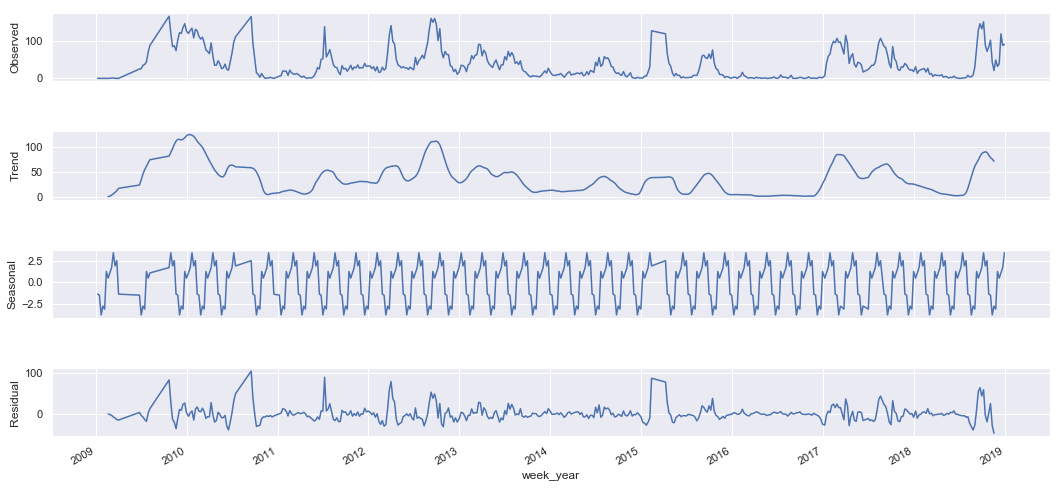

In [44]:
# decompose the series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(fluser['Flu_pos'], freq=12)  
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)

## 5.2)  Stationarity test - summary statistics & Dickey-Fuller

In [83]:
# create a function to test stationarity of the series
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # will check rolling mean and std for 52 weeks per year
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print ("Reject null hypothesis, data is stationary")
    else:
        print ("Fail to reject H0 thereby data is non-stationary ")

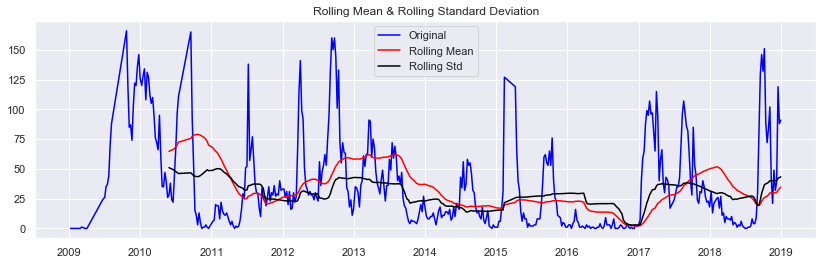

Results of Dickey-Fuller Test:
Test Statistic                  -5.138863
p-value                          0.000012
#Lags Used                       0.000000
Number of Observations Used    477.000000
Critical Value (1%)             -3.444134
Critical Value (5%)             -2.867618
Critical Value (10%)            -2.570008
dtype: float64
Reject null hypothesis, data is stationary


In [84]:
test_stationarity(fluser['Flu_pos'])

### P-value is < .05, hence we reject null hypothesis and data series is stationary.

We will analyze this dataset two ways:

   1) We will use ARIMA model 
   
   2) We will use SARIMA model to see the difference

# 6) ARIMA 

## 6.1) Make series smoother for ARIMA 

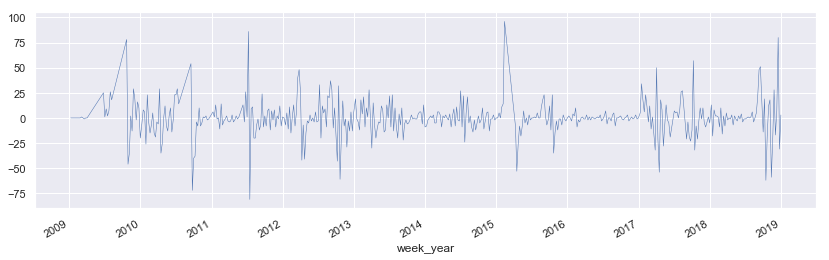

In [48]:
# Our series is stationary , we do not need to differenciate.
# I will use shift to see what differencing does to series.
# which looks like over done to me, we will see how it works with ARIMA.

ts_diff = fluser
#ts_diff['fludiff'] = np.log(ts_diff['Flu_pos']).diff(periods=1)

ts_diff['fludiff'] = fluser['Flu_pos']-fluser['Flu_pos'].shift(1)

ts_diff.replace([np.inf, -np.inf], np.nan)
ts_diff = ts_diff.fillna(0)


import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 4)})
ts_diff['fludiff'].plot(linewidth=0.5);

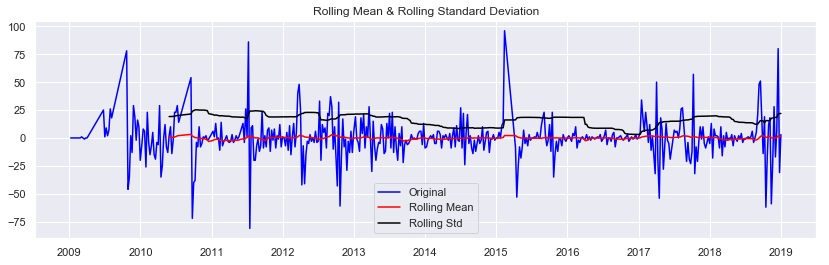

Results of Dickey-Fuller Test:
Test Statistic                -8.811553e+00
p-value                        1.985014e-14
#Lags Used                     1.000000e+01
Number of Observations Used    4.670000e+02
Critical Value (1%)           -3.444431e+00
Critical Value (5%)           -2.867749e+00
Critical Value (10%)          -2.570077e+00
dtype: float64
Reject null hypothesis, data is stationary


In [85]:
# will check rolling mean and std for 52 weeks per year for the series we took difference
# rolling mean is smoother than before
test_stationarity(ts_diff['fludiff'])

<Figure size 1008x288 with 0 Axes>

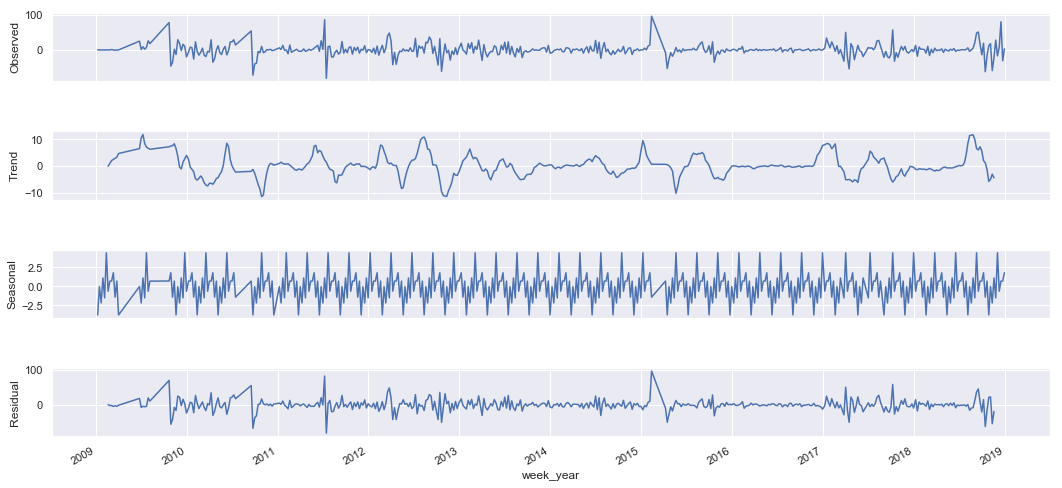

In [50]:
# decompose the series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_diff['fludiff'], freq=12)  
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)

## 6.2) ARIMA parameters

In [64]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [65]:
# search best combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [620]:
# ARIMA grid search for ts_diff series with 1st difference
# evaluate parameters
p_values = [1]
d_values = range(0, 2)
q_values = [0,1,2]
warnings.filterwarnings("ignore")
evaluate_models(ts_diff['fludiff'], p_values, d_values, q_values)

ARIMA(7, 0, 0) MSE=286.290
ARIMA(7, 0, 2) MSE=277.206
ARIMA(7, 1, 0) MSE=333.203
ARIMA(7, 1, 1) MSE=288.253
Best ARIMA(7, 0, 2) MSE=277.206


## 6.3) Train and predict with ARIMA 

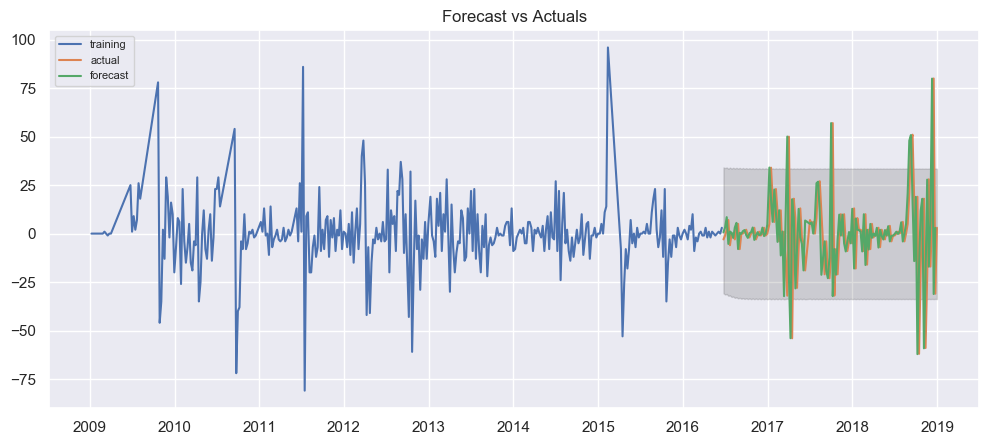

In [94]:
# Split in to Training and Test dataset with best parameters per above grid search 
#ts_diff.dropna()
train = ts_diff.fludiff[:350]
test = ts_diff.fludiff[350:]

# best param for ARIMA from above
  
model = ARIMA(train, order=(7, 0, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(128, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# invert the difference in predictions
fc_series= fc_series + ts_diff['fludiff'].shift(-1) 

lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

 * ARIMA after 1st difference looks overfit, I will try ARIMA without difference

In [102]:
# ARIMA grid search for original series without difference
# evaluate parameters
p_values = [1,7]
d_values = range(0, 2)
q_values = [0,1,2]
warnings.filterwarnings("ignore")
evaluate_models(ts_diff['Flu_pos'], p_values, d_values, q_values)

ARIMA(1, 0, 0) MSE=271.272
ARIMA(1, 0, 1) MSE=272.425
ARIMA(1, 0, 2) MSE=276.718
ARIMA(1, 1, 0) MSE=285.211
ARIMA(7, 0, 0) MSE=275.567
ARIMA(7, 0, 1) MSE=274.779
ARIMA(7, 1, 0) MSE=286.292
ARIMA(7, 1, 1) MSE=285.847
ARIMA(7, 1, 2) MSE=276.264
Best ARIMA(1, 0, 0) MSE=271.272


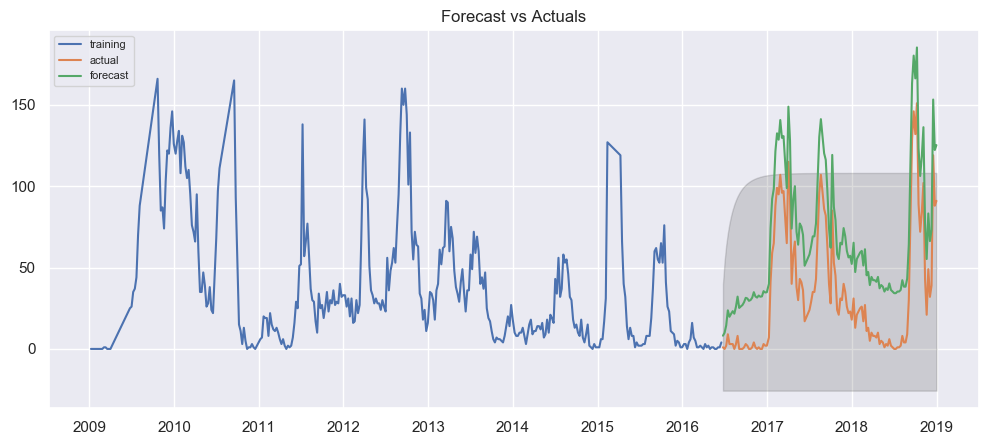

In [119]:
# Split in to Training and Test dataset with best parameters per above grid search 
# see ARIMA without taking difference
train = ts_diff.Flu_pos[:350]
test = ts_diff.Flu_pos[350:]

# best param for ARIMA from above
  
model = ARIMA(train, order=(1, 0, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(128, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)


fc_series= fc_series + ts_diff['Flu_pos']

lower_series = pd.Series(conf[0, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#  7) Conclusion


 ARIMA models are great way to predict time series. As ARIMA uses moving average, it is lot better than regression.